
# Project: FBI Gun data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

# I will be exploring the FBI Gun Data and I'll try to show how the number of purchases is connected to other factors like the time of year and the states in which these purchases occur.
## The questions I will be asking would be:
## Is there a direct relationship between the time of year and the number of purchases of guns?
## How does the number of purchases vary along the years? Is it always increasing?
## Does the number of purchases depend on the state where it occurs? And if so, is that due to the state having a bigger population or is it independant of that? 

In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('gun_data.csv')
print(df.head())
df.describe()

     month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \


,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000



### Data Cleaning for gun data: 

## 1.Removing unwanted columns and filling the remaining columns that contain null values with their mean
## 2.Changing month column to contain only the month number and put year in its own column

## Later on I'll be reading the Census data and cleaning it.


In [28]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['permit_recheck', 'other', 'prepawn_other'], axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)

# Changing month column to have only month and put year in its own column
df['date'] = pd.to_datetime(df['month'],format='%Y-%m', errors='coerce')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: 
## How many total checks does the FBI conduct yearly and which month has the most checks?

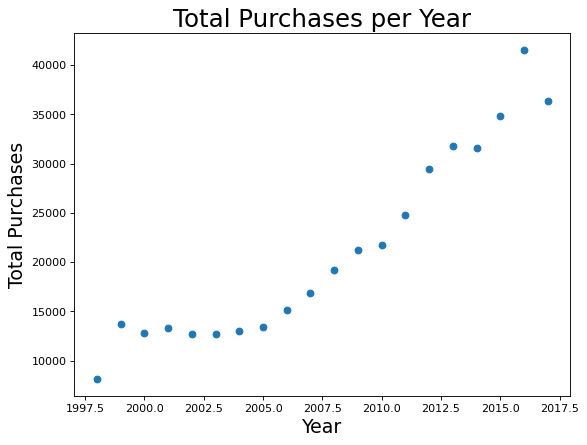

In [29]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
x = df.groupby(['year'])['totals'].mean().index.values
y = df.groupby(['year'])['totals'].mean().values
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x, y)
plt.title('Total Purchases per Year', fontsize=22)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Total Purchases', fontsize=17)
plt.show()

## It's Obvious that the number of background checks increase exponentially but decreases at the end but that's because this data doesn't include the last three months of 2019 (It ends at 09-2019)

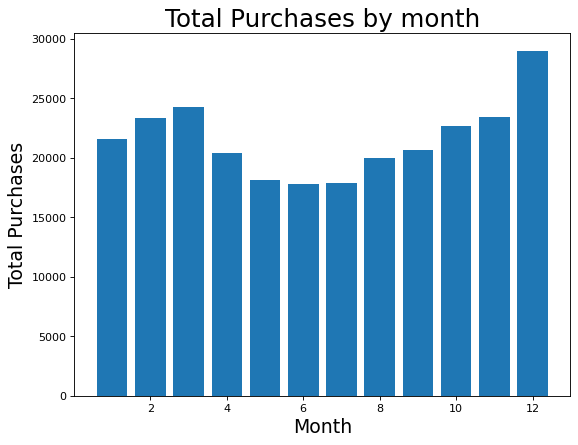

In [30]:
x = df.groupby(['month'])['totals'].mean().index.values
y = df.groupby(['month'])['totals'].mean().values
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(x, y)
plt.title('Total Purchases by month', fontsize=22)
plt.xlabel('Month', fontsize=17)
plt.ylabel('Total Purchases', fontsize=17)
plt.show()

## It appears that December is the month on which most people purchase guns.
## And the number of purchases generally decline during the summer

### Research Question 2: 
## Which state has contributed the most purchases and how much is it greater than the rest?

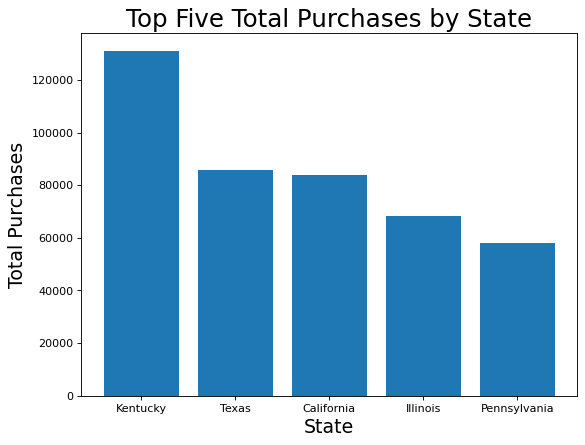

In [31]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
x = df.groupby(['state'])['totals'].mean().sort_values(ascending=False)[:5].index.values
y = df.groupby(['state'])['totals'].mean().sort_values(ascending=False)[:5].values
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(x, y)
plt.title('Top Five Total Purchases by State', fontsize=22)
plt.xlabel('State', fontsize=17)
plt.ylabel('Total Purchases', fontsize=17)
plt.show()

## Here we see the top five states and Kentucky appears to have much more purchases than the remaining four states in comparison.

# To See how much Kentucky is really dominating we can compare it with more states.

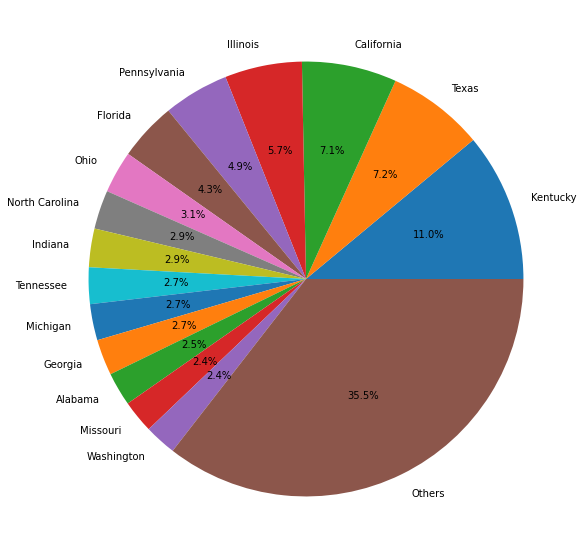

In [32]:
sumOfMeanTotals = df.groupby(['state'])['totals'].mean().values.sum()

labels = df.groupby(['state'])['totals'].mean().sort_values(ascending=False)[:15].index.values
topStatesMeans = df.groupby(['state'])['totals'].mean().sort_values(ascending=False)[:15].values 
topStatesMeansPercentage = topStatesMeans / sumOfMeanTotals
labels = np.append(labels, 'Others')
others = (sumOfMeanTotals - sum(topStatesMeansPercentage) * sumOfMeanTotals) / sumOfMeanTotals
topStatesMeansPercentage = np.append(topStatesMeansPercentage, others)
plt.figure(figsize=(15, 10))
plt.pie(topStatesMeansPercentage, labels=labels,autopct='%1.1f%%')
plt.show()

# Here we have the top 15 states and we can observe that beginning from Ohio or North Carolina (3%) they are all pretty close to each other 

## Data cleaning for Census Data:

## Reading the Census Data, dropping the Fact Note column as it contains lots of nulls, dropping any remaining nulls, and replacing commas in numbers so that we can read them as integers.
## Then we'll merge both guns data and census data using the guns data's state column to index into each state's column in Census data. We observe that in guns data we have a state column containing the names of the states and in the Census data we have each state as its own column.

In [33]:

df2 = pd.read_csv('U.S. Census Data.csv')
df2.drop(['Fact Note'], axis=1, inplace=True)
df2.dropna(inplace=True)
df2 = df2.replace(',','', regex=True)
df2.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates July 1 2016 (V2016),4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,Population estimates base April 1 2010 (V2016),4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,Population percent change - April 1 2010 (esti...,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,Population Census April 1 2010,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,Persons under 5 years percent July 1 2016 (V2...,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


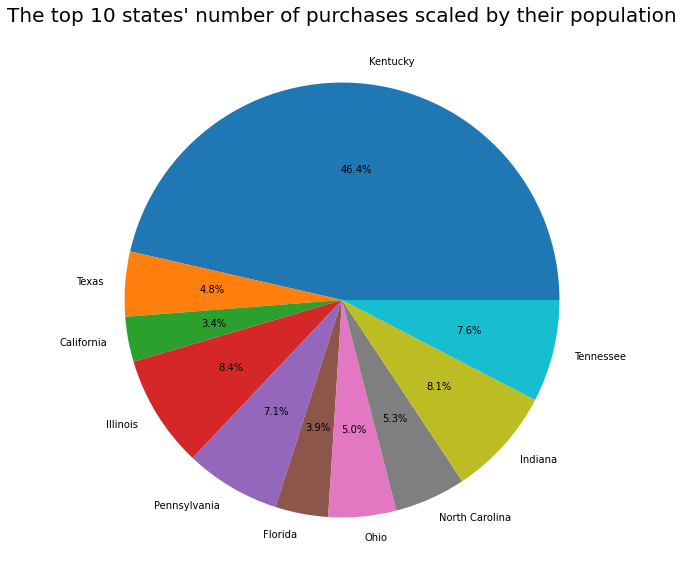

In [49]:
# We know that the first row contains the population in 2016 So we'll loop through our
# previous data and divide each state's population by it's total purchases as a kind of normalization

labels = df.groupby(['state'])['totals'].mean().sort_values(ascending=False)[:10].index.values
statesMeans = df.groupby(['state'])['totals'].mean().sort_values(ascending=False)[:10].values 

for index, state in enumerate(labels): # labels contains the state's name
    if state in df2.columns:
        statesMeans[index] = statesMeans[index] / int(df2[state][0]) # We divide each state's totals
                                                            # by its population

statesMeans /= sum(statesMeans) # Here we divide by the total to see them relative to eachother
plt.figure(figsize=(15, 10))
plt.pie(statesMeans, labels=labels,autopct='%1.1f%%')
plt.title("The top 10 states' number of purchases scaled by their population", fontsize=20)
plt.show()

## Here we observe the Top 10 states but relative to their population and to eachother
## Ofcourse If we only calculated the purchases per person other states will prevail as some states have pretty small populations and have outcomers buying guns from there.

# Now we'll compare the populations of these states to have a nice view and make sure that Kentucky isn't dominating because it has the biggest population.

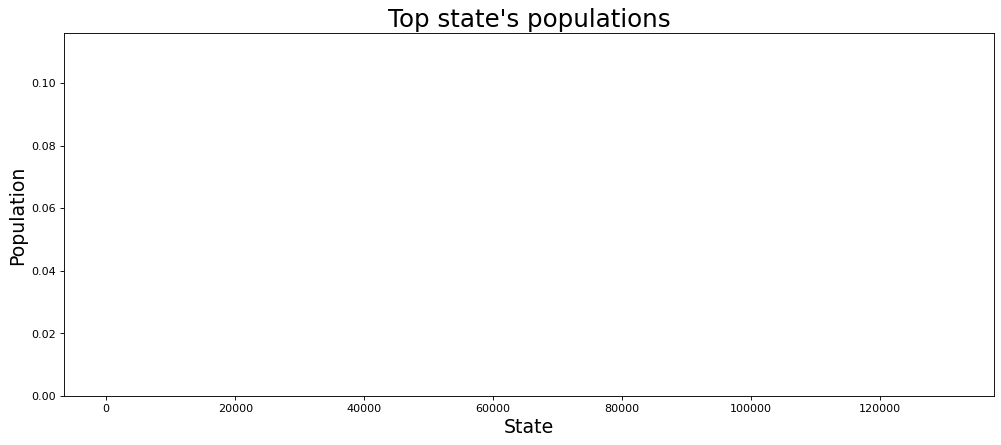

In [35]:
statesPopulations = np.copy(statesMeans)

for index, state in enumerate(labels): # labels contains the state's name
    if state in df2.columns:
        statesPopulations[index] = int(df2[state][0])
plt.figure(figsize=(15, 6), dpi=80)
plt.bar(labels, statesPopulations)
plt.title('Top state\'s populations', fontsize=22)
plt.xlabel('State', fontsize=17)
plt.ylabel('Population', fontsize=17)
plt.show()

<a id='conclusions'></a>
## Conclusions

## We observed some simple stats about the states and the months where the most purchases occur. We also saw how the purchases of ammunition is in continuous increase along the years.

## We can conclude that despite having a relatively low population, Kentucky has the most purchases by a large gap than its closest competitors which have much larger populations. We can see that Texas is almost five times more populated than Kentucky and California is eight times more populated than Kentucky as well, yet Kentucky has 1.5 times more gun purchases than them. 

## The limitations to this analysis include:

## 1. The data isn't updated so we can't see the data for the last two years, yet we still have a general overview of how it's changing.
## 2. Some states in gun data are missing from the census data, five to be exact, but we just wanted to explore the states with top purchases and they're all present so it's kind of fine.


# References:

Used to convert xlsx to csv :
https://www.zamzar.com/uploadComplete.php?convertFile=xlsx&to=csv&session=ceac3cb9a5982d1fb2ce8cbcd1184753&email=false&tcs=Z90

Used to convert month column which has a format (YYYY-MM) to datetime:
https://stackoverflow.com/questions/62676123/pandas-converting-date-string-only-month-and-year-to-datetime

Used to extract columns from dataframe:
https://stackoverflow.com/questions/17241004/how-do-i-convert-a-pandas-series-or-index-to-a-numpy-array

To remove commas from numbers:
https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once